<a href="https://colab.research.google.com/github/harshitnariya8/segminds_SSD_1B_testing/blob/main/segminds_SSD_1B_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install git+https://github.com/huggingface/diffusers


  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-0knpschh
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-0knpschh
  Resolved https://github.com/huggingface/diffusers to commit 9135e54e768a59ddcf8ad18818d2ffe69ea3a32a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.3 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.22.0.dev0-py3-none-any.whl size=1602258 sha256=6859e3e8010667c44e17e56227edd71681f5fc056561822fa3101295bc3bc093
  Stored in directory: /tmp/pip-ephem-wheel-cache-zd24usx2/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers


In [3]:
pip install transformers accelerate safetensors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [4]:
from diffusers import StableDiffusionXLPipeline
import torch
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
pipe.to("cuda")
# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()


StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.22.0.dev0",
  "_name_or_path": "segmind/SSD-1B",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [10]:
prompt = "Gujarati Girl doing garba in traditional attire" # Your prompt here
neg_prompt = "ugly, blurry, poor quality" # Negative prompt here
image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [7]:
print(image)

<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7DDAF51A6950>


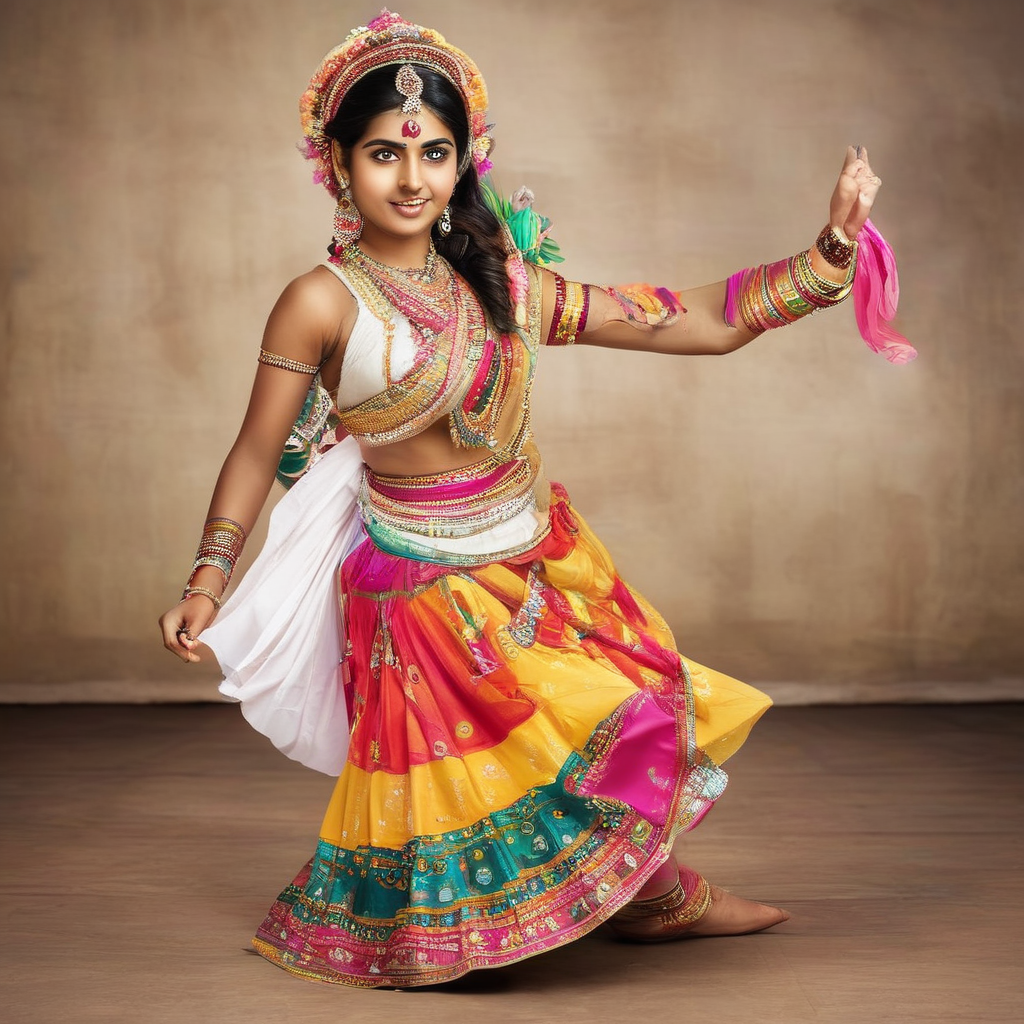

In [11]:
image

In [12]:
prompt = "Lion family enjoying in jungle" # Your prompt here
neg_prompt = "ugly, blurry, poor quality" # Negative prompt here
image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

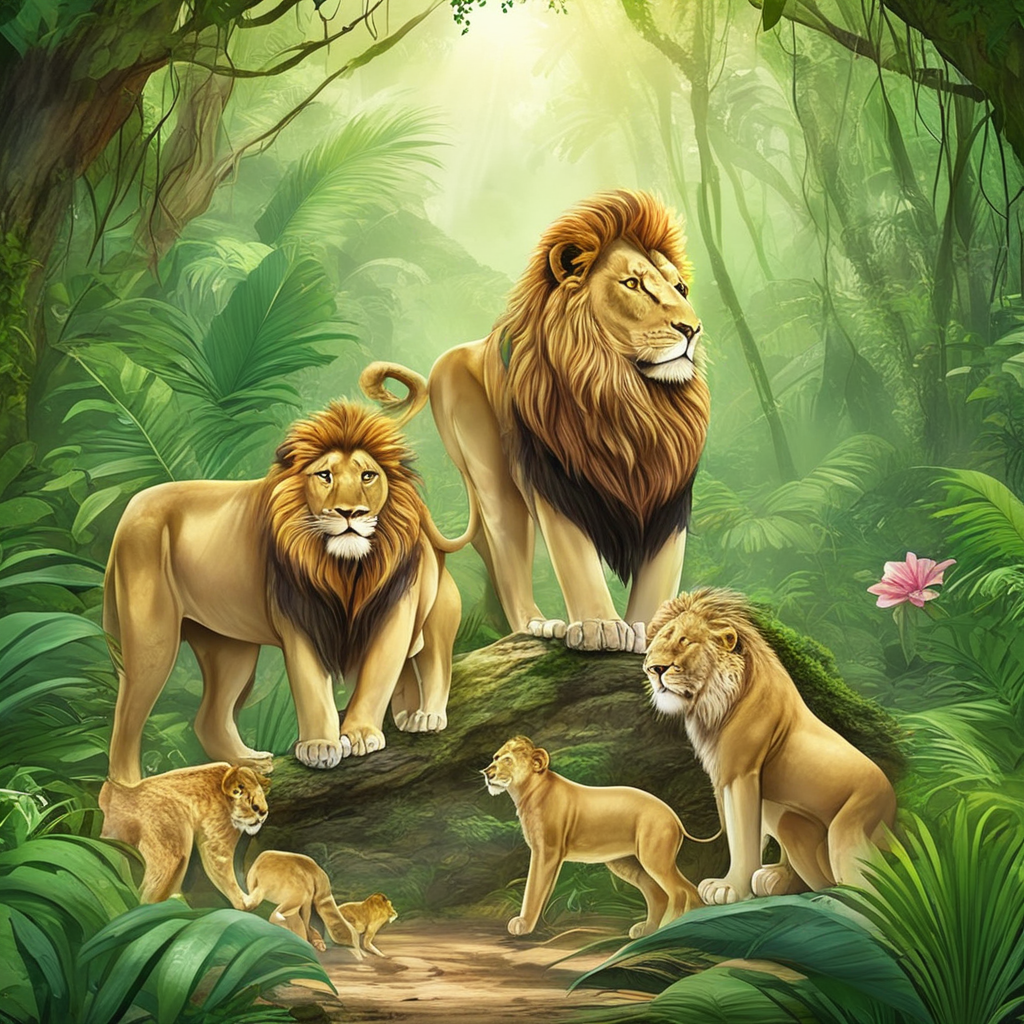

In [13]:
image